In [4]:
#損失関数の実装 2乗誤差
import numpy as np

In [5]:
def mean_squared_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [9]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ]
mean_squared_error (np.array(y), np.array(t))

0.097500000000000031

In [11]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error (np.array(y), np.array(t))

0.59750000000000003

In [12]:
#交差エントロピー誤差関数の実装

In [13]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [14]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0 ]
cross_entropy_error (np.array(y), np.array(t))

0.51082545709933802

In [15]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

In [17]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) =  load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [18]:
#ランダムに１０枚だけ抜き出すスクリプト

In [19]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = x_train[batch_mask]

In [20]:
batch_mask

array([37154, 12958, 42145,   928, 52485, 22695,   123, 25680, 27712,  8552])

In [21]:
#損失関数のbatch版

In [31]:
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y)) /batch_size

In [32]:
t

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [33]:
#教師データがラベルとして与えられた場合。

In [39]:
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return-np.sum(np.log(y[np.arange(batch_size),t])) / batch_size

In [40]:
#微分悪い実装例

In [41]:
def numerical_diff(f,x):
    h=10e-50　#さすがにhが小さすぎる
    return (f(x+h) - f(x))/h

In [42]:
np.float32(1e-50)

0.0

In [43]:
#ありえる範囲で微分を

In [44]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h)) /2*h

In [45]:
#数値微分の例　y=0.01x2 +0.1x

In [46]:
def function_1(x):
    return 0.01*x**2 +0.1*x

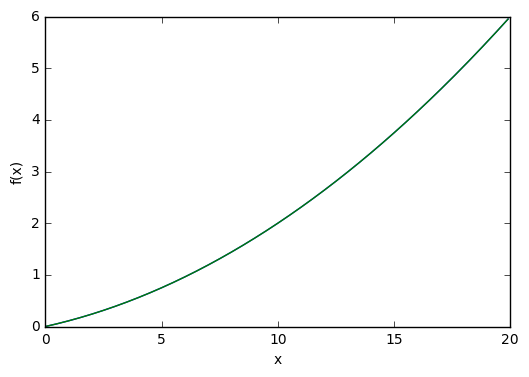

In [52]:
import numpy as np
import matplotlib.pylab as plt

x=np.arange(0.0, 20.0, 0.1)
y= function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [53]:
numerical_diff(function_1,5)

1.9999999999908982e-09

In [54]:
numerical_diff(function_1, 10)

2.999999999986347e-09

0.1999999999990898


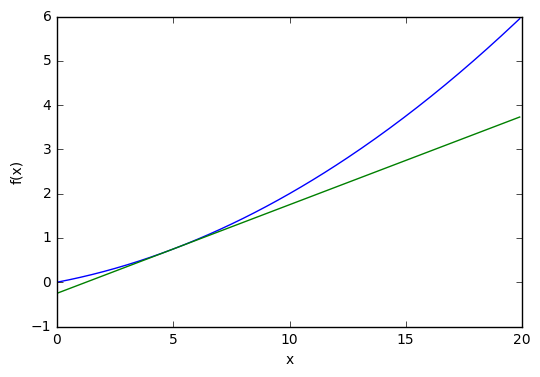

In [57]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x  #yという名前のつけ方がよくない。切片なのだから別の名前にすべき。
    return lambda t: d*t + y #lambdaを使うと
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)　#tfという関数を定義している。
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [58]:
tf

<function __main__.tangent_line.<locals>.<lambda>>

In [60]:
#偏微分　f(x0, x1)=x0**2 + x1**2

In [80]:
def function_2(x):
    return np.sum(x**2)

In [62]:
# xo=3, x1=4で　δf/δxoの偏微分を求める。

In [63]:
def function_tmp1(x0):
    return x0*x0 +4.0**2.0

numerical_diff(function_tmp1,3.0)

6.00000000000378

In [64]:
def function_tmp2(x1):
    return 3.0**2 +x1*x1

numerical_diff(function_tmp2,4.0)

7.999999999999119

In [84]:
def function_2(x):
    return x[0]**2 +x[1]**2

In [127]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) #xと同じ形状の配列を生成
    
    for idx  in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1=f(x)
        
        x[idx]=tmp_val - h
        fxh2=f(x)
        grad[idx] =(fxh1-fxh2)/(2*h)
        
        x[idx] =tmp_val
        
        return grad

In [128]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  0.])

In [129]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  0.])

In [109]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad

In [110]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [130]:
#ln127とln109の違いが深い。インデントの位置が問題。ln109はfor文全体で終わることになっていない。結構ここで躓いた。

/Users/satoc/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


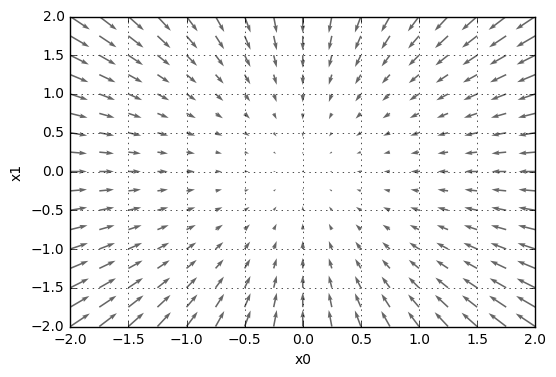

In [131]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [132]:
#勾配効果法のの実装

In [140]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x=init_x
    
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x -=lr*grad
    return x

In [141]:
def function_2(x):
    return x[0]**2 +x[1]**2
init_x=np.array([-3.0,4.0])

In [142]:
gradient_descent(function_2,init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

In [143]:
#学習効率が高すぎる場合
gradient_descent(function_2,init_x, lr=10, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

In [144]:
#学習効率が低すぎる場合
gradient_descent(function_2,init_x, lr=1e-10, step_num=100)

array([  2.34235971e+12,  -3.96091057e+12])

In [145]:
#簡単なニュートラルネットワークを例にして、実際に勾配を求める実装を行う。そのために、simpleNetというクラスを実装する。

In [159]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.w =np.random.randn(2,3)
        
    def predict(self,x):
        return np.dot(x, self.w)
    
    def loss(self, x, t):
        z= self.predict(x)
        y=softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [160]:
net = simpleNet()
print(net.w)

[[-0.44338398  0.94283647  1.65715958]
 [ 0.227587   -1.333623   -0.58084153]]


In [161]:
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)

[-0.06120209 -0.63455882  0.47153837]


In [163]:
np.argmax(p)

2

In [164]:
t=np.array([0,0,1])
net.loss(x,t)

0.6512188602834289

In [165]:
def f(w):
    return net.loss(x,t)
dw=numerical_gradient(f,net.w)
print(dw)

[[ 0.18364974  0.10350435 -0.28715408]
 [ 0.2754746   0.15525652 -0.43073112]]


In [166]:
#twolayerNETの実装

In [184]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [185]:
net =TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [186]:
net.params['W1']

array([[-0.00682339, -0.00014303, -0.004881  , ..., -0.00969882,
        -0.00978879, -0.00412415],
       [ 0.0062252 , -0.01164003,  0.01482737, ...,  0.00866503,
        -0.02371887, -0.00081859],
       [-0.01496132, -0.0185761 , -0.01816208, ..., -0.0057552 ,
         0.00129809,  0.00085826],
       ..., 
       [ 0.01043429, -0.00845335,  0.00852338, ...,  0.00662346,
         0.00717903, -0.00561707],
       [ 0.00564833,  0.01230773,  0.00909206, ..., -0.00561853,
        -0.00157602, -0.00282103],
       [ 0.00986572, -0.01076861, -0.00730746, ...,  0.02242229,
        -0.00560054, -0.00340781]])

In [187]:
net.params['W1'].shape


(784, 100)

In [188]:
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [189]:
x=np.random.rand(100, 784)
t=np.random.rand(100, 10)
grads=net.numerical_gradient(x,t) #もしかしてこの処理めっちゃ重い？

In [ ]:
print(grads['W1'].shape)

In [ ]:
grads['W1'].shpe

In [191]:
x=np.random.rand(100,784)
t=np.random.rand(100,10)
grads=net.numerical_gradient(x,t)

In [192]:
print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [193]:
#ミニバッジ学習の実装

train acc, test acc | 0.112366666667, 0.1135
train acc, test acc | 0.781316666667, 0.7876
train acc, test acc | 0.87595, 0.8798
train acc, test acc | 0.898566666667, 0.9009
train acc, test acc | 0.907766666667, 0.9129
train acc, test acc | 0.915116666667, 0.9182
train acc, test acc | 0.92, 0.9225
train acc, test acc | 0.923716666667, 0.9266
train acc, test acc | 0.927516666667, 0.9309
train acc, test acc | 0.931166666667, 0.9335
train acc, test acc | 0.93415, 0.9359
train acc, test acc | 0.93605, 0.9372
train acc, test acc | 0.938733333333, 0.9393
train acc, test acc | 0.941383333333, 0.9412
train acc, test acc | 0.943183333333, 0.9425
train acc, test acc | 0.9456, 0.9447
train acc, test acc | 0.946616666667, 0.9459


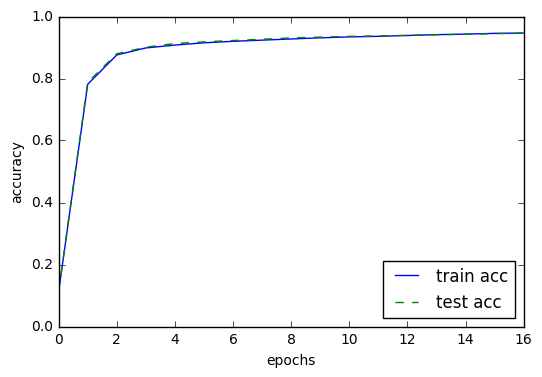

In [195]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()